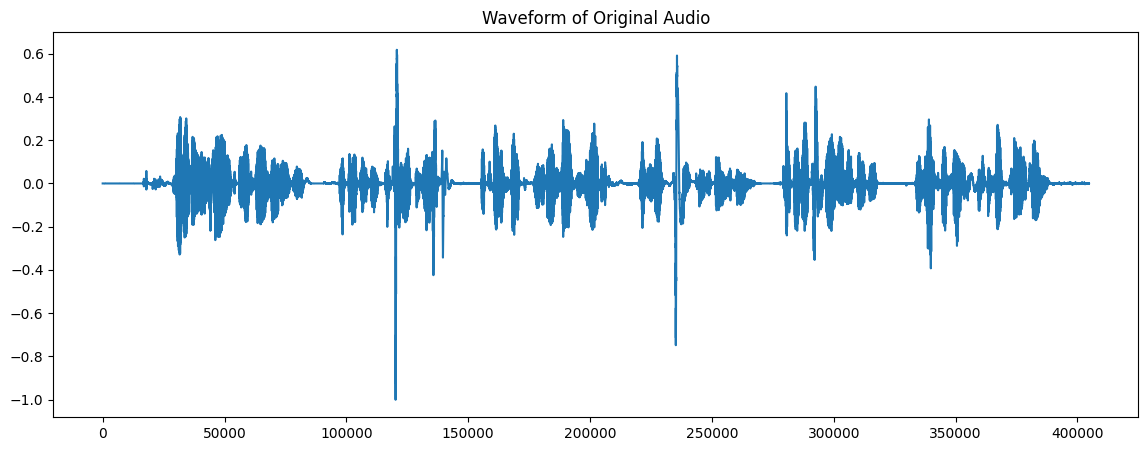

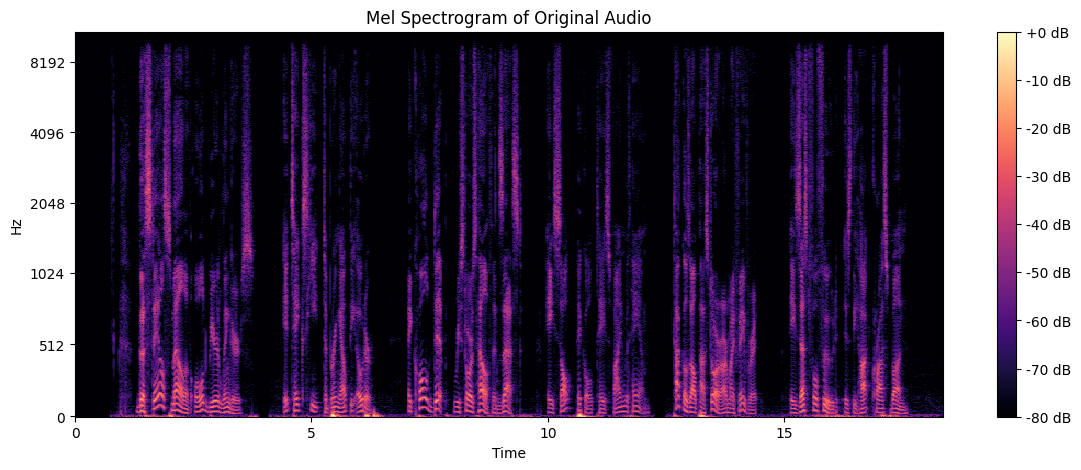

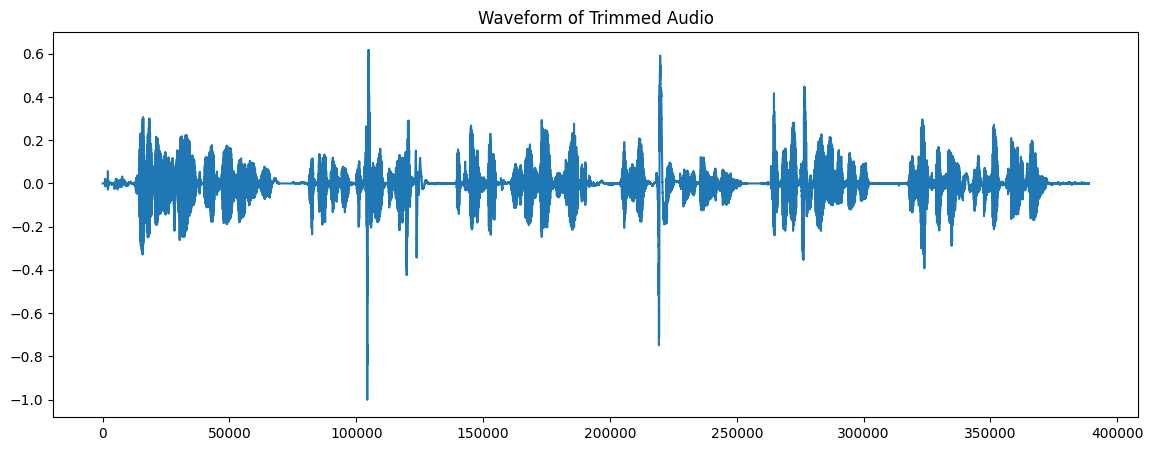

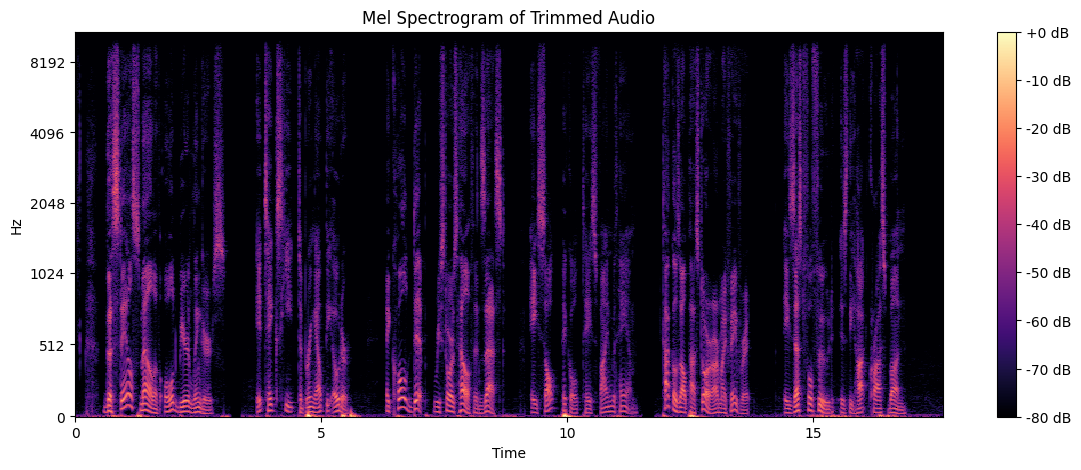

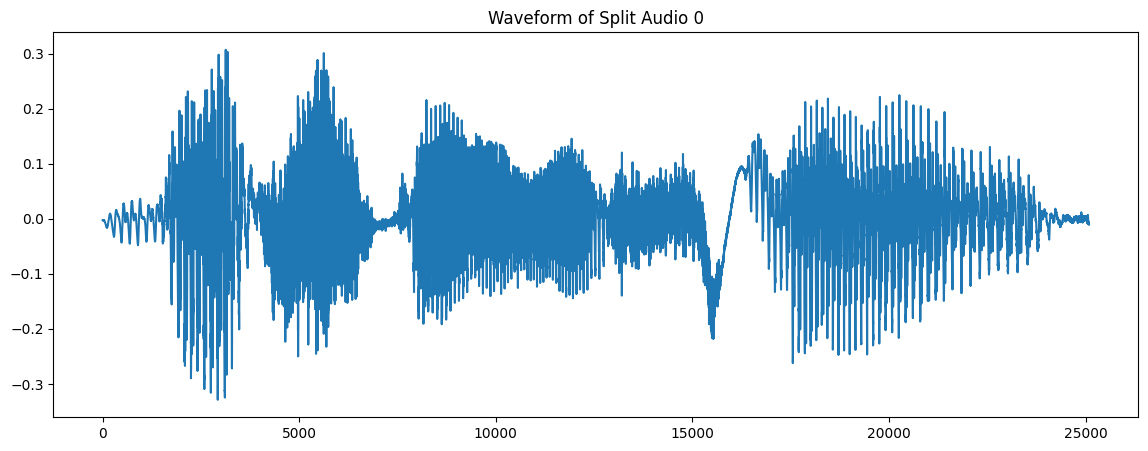

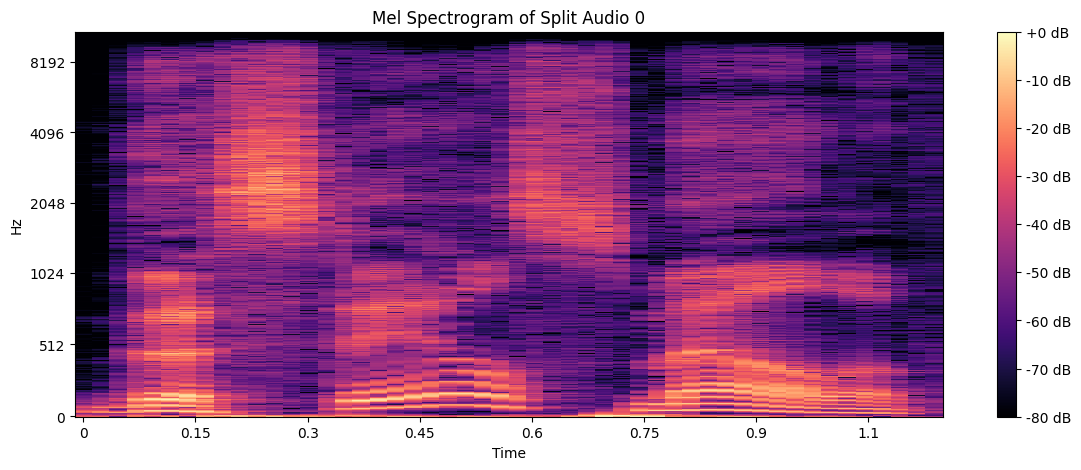

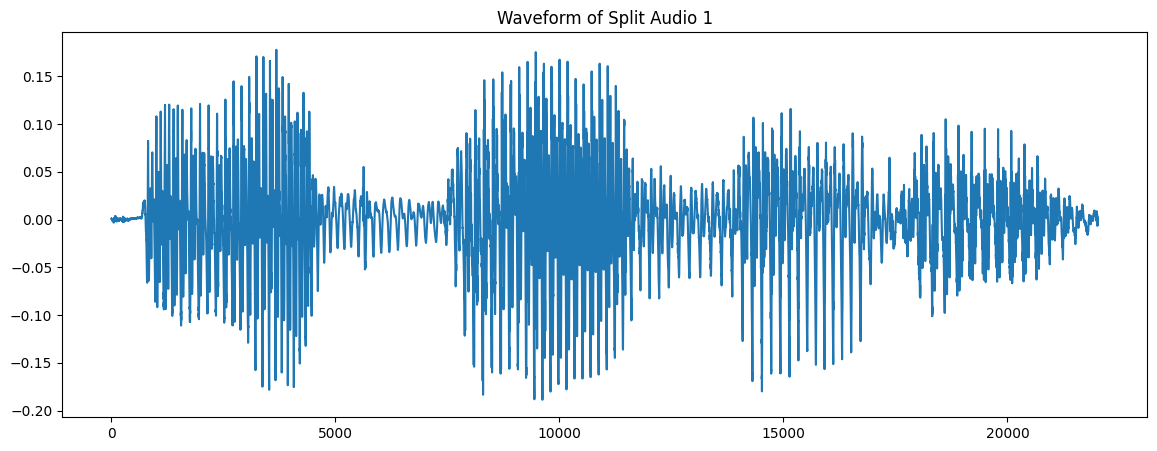

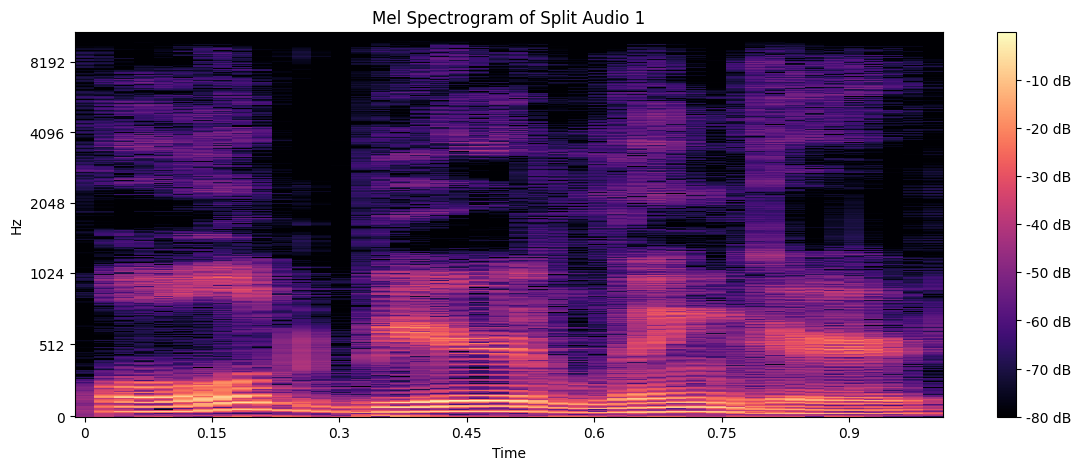

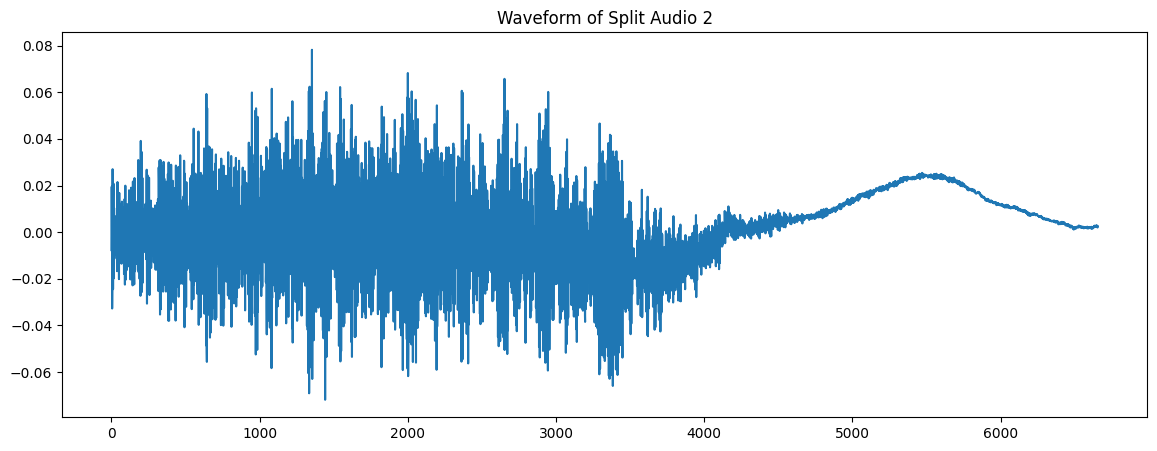

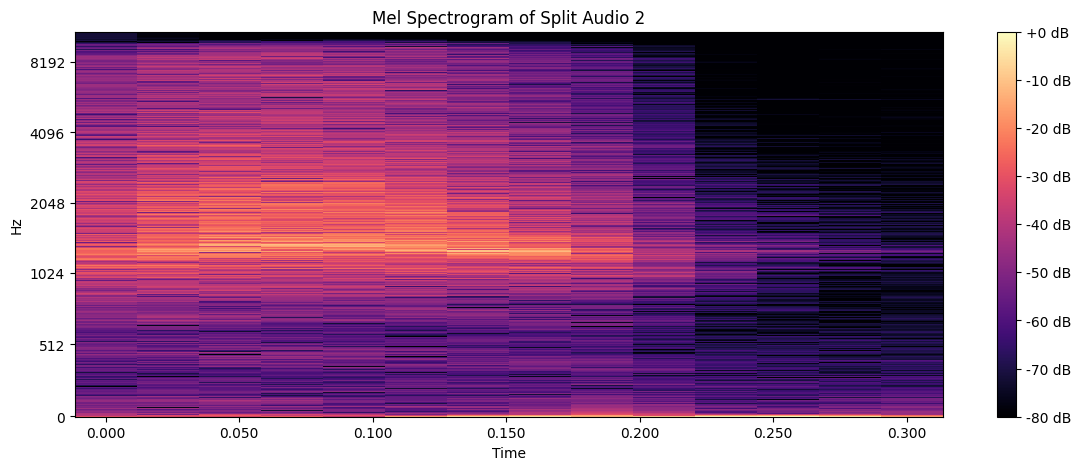

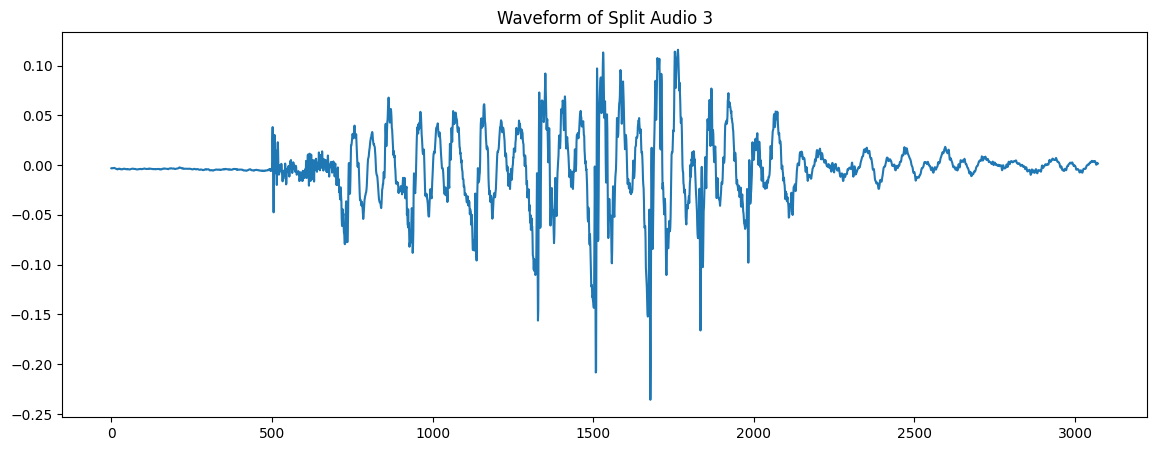

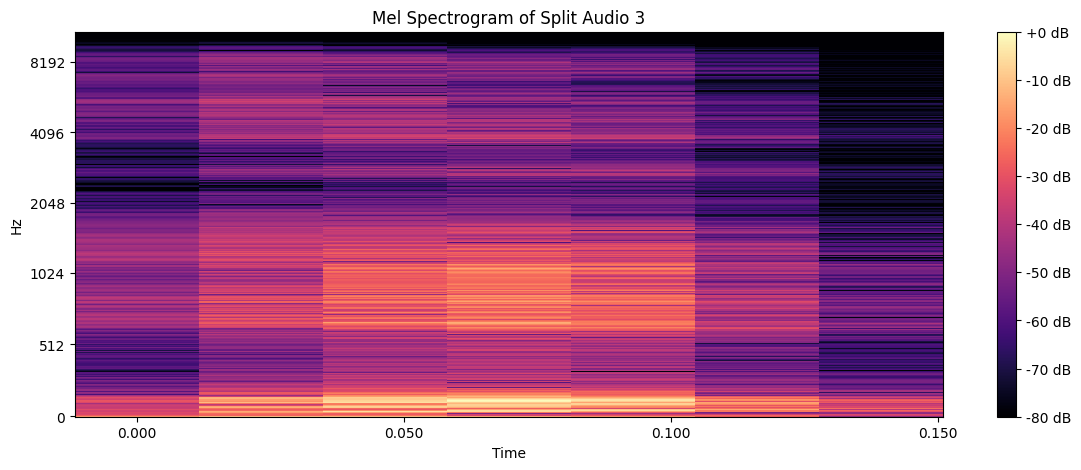

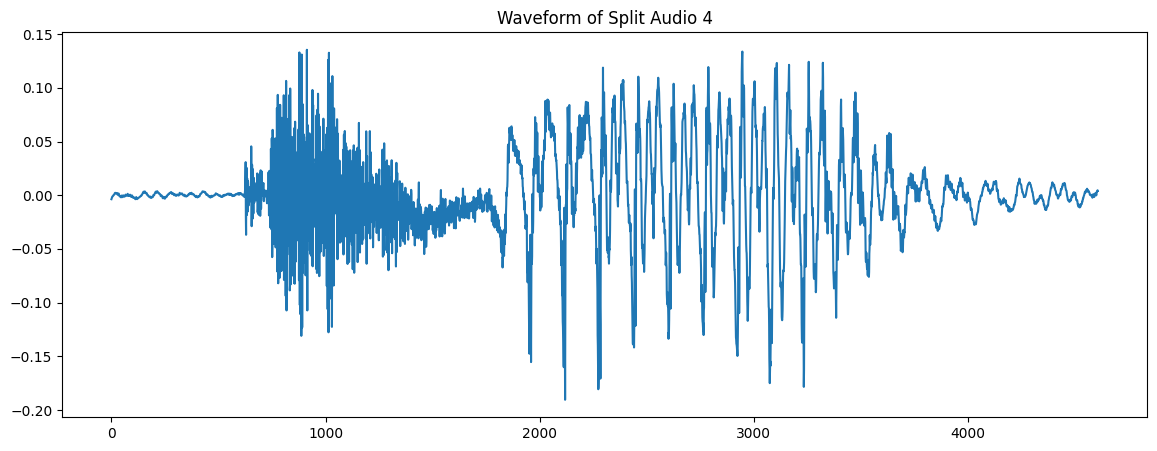

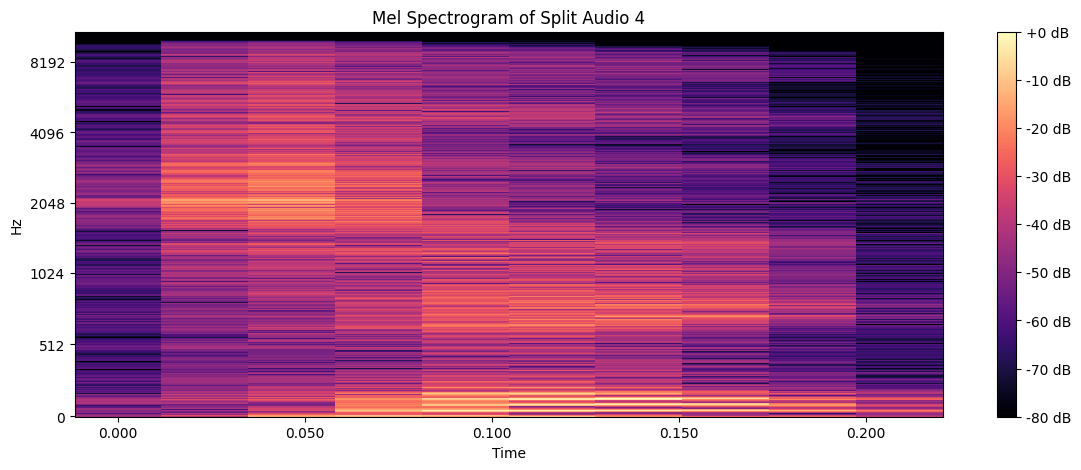

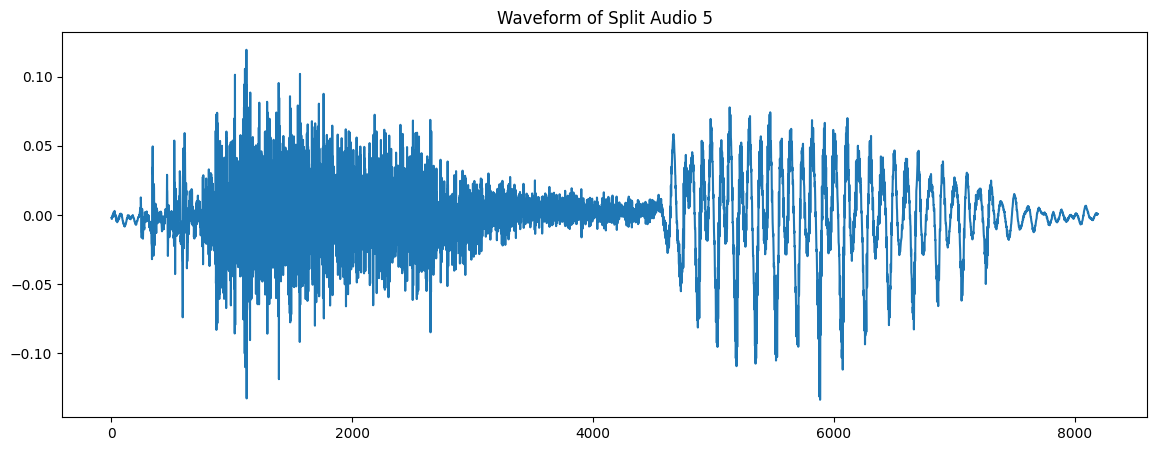

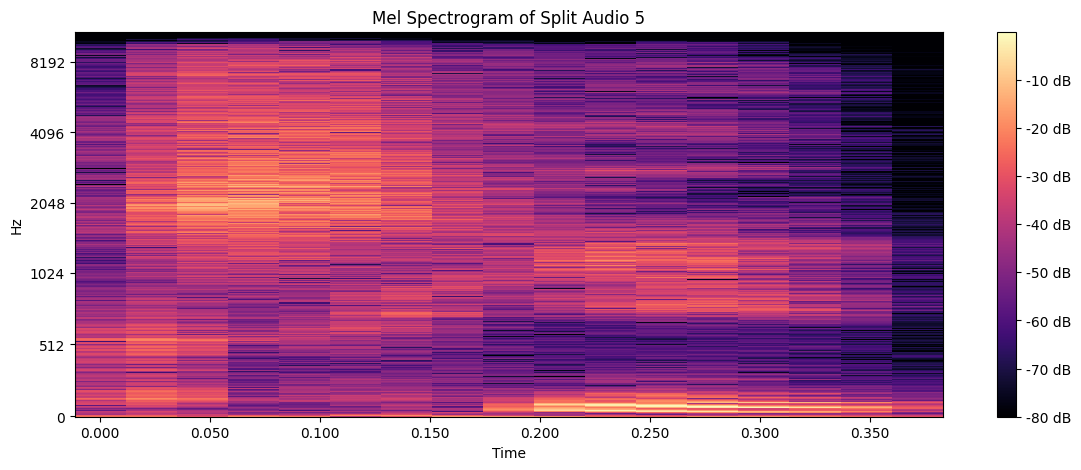

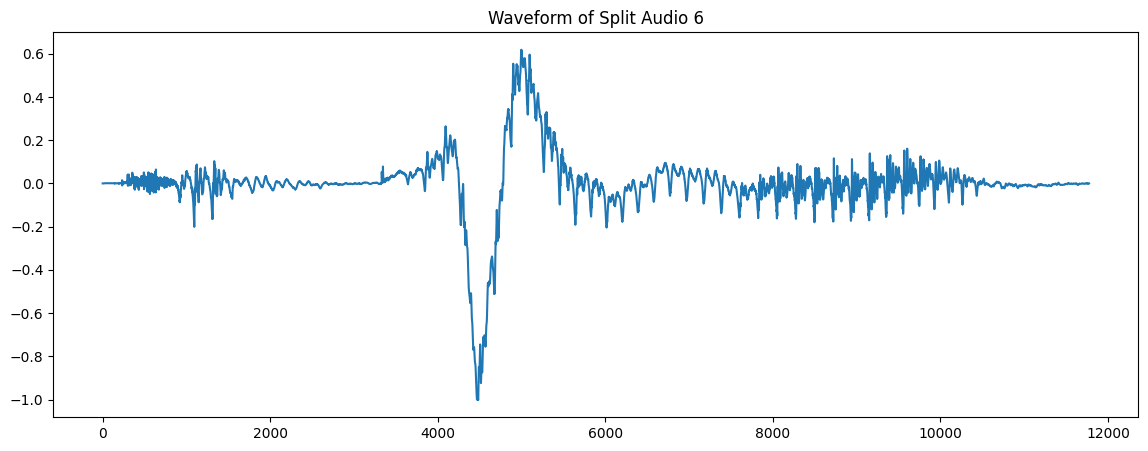

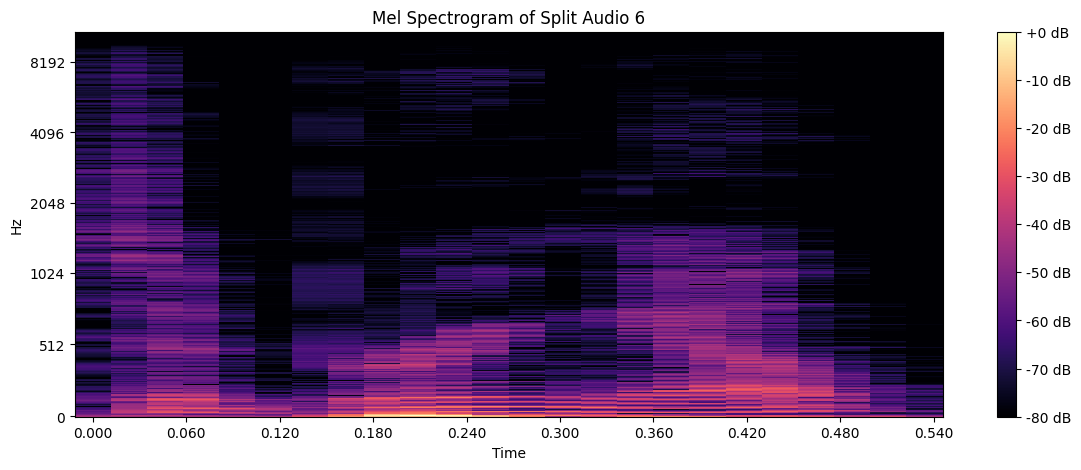

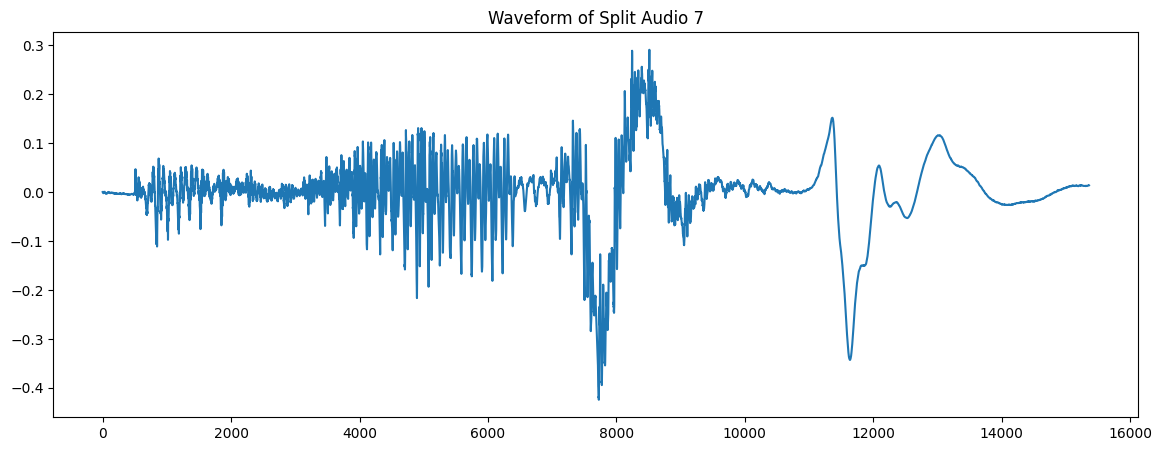

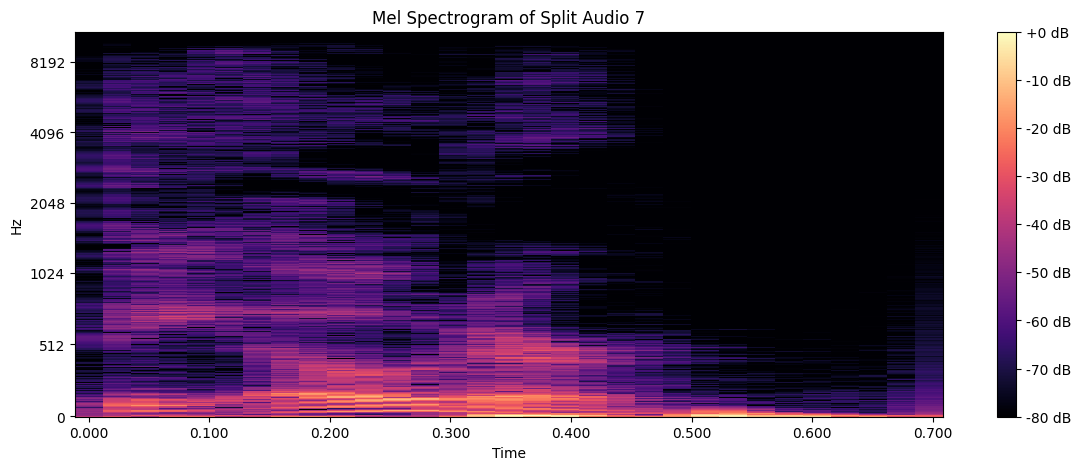

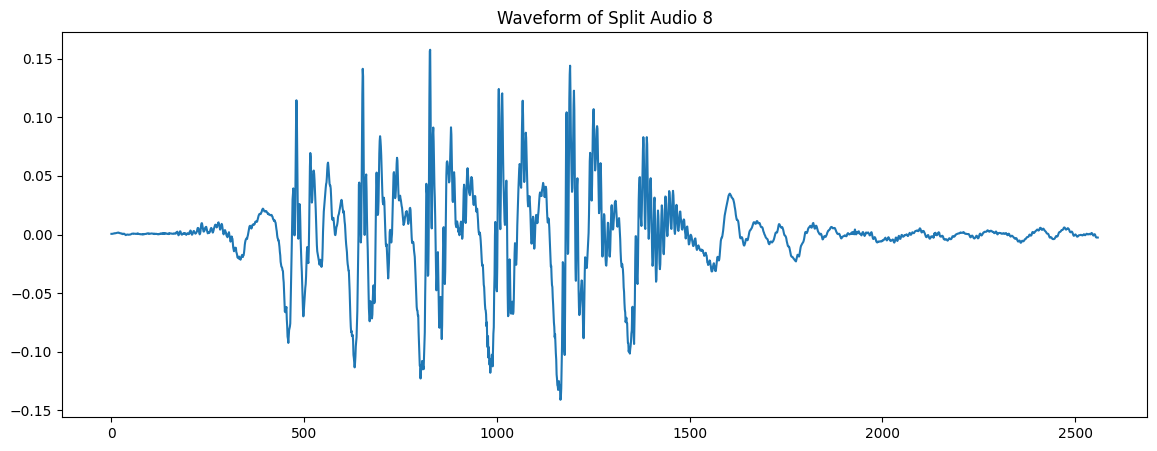

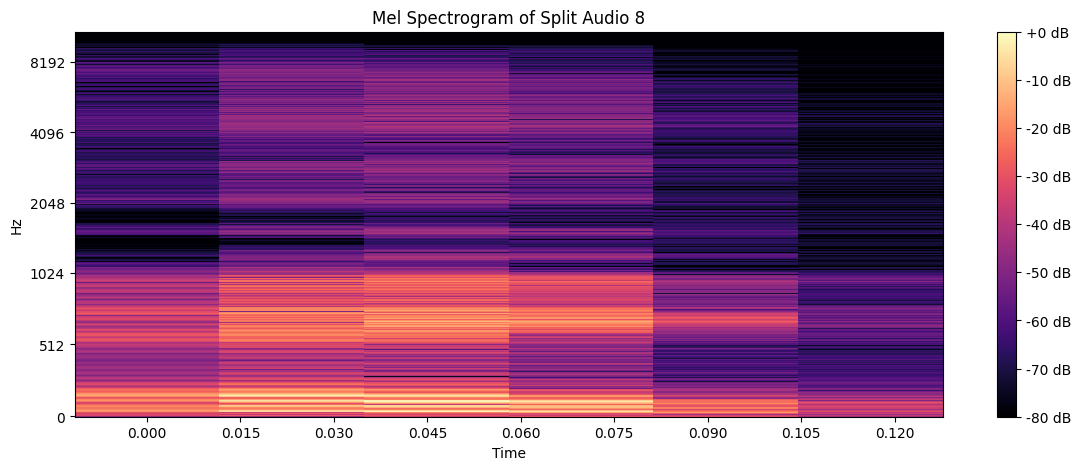

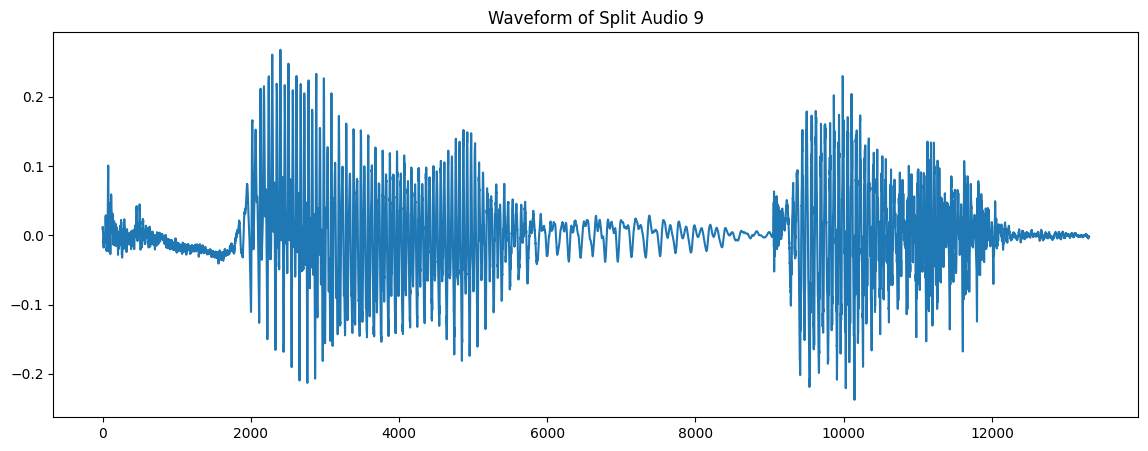

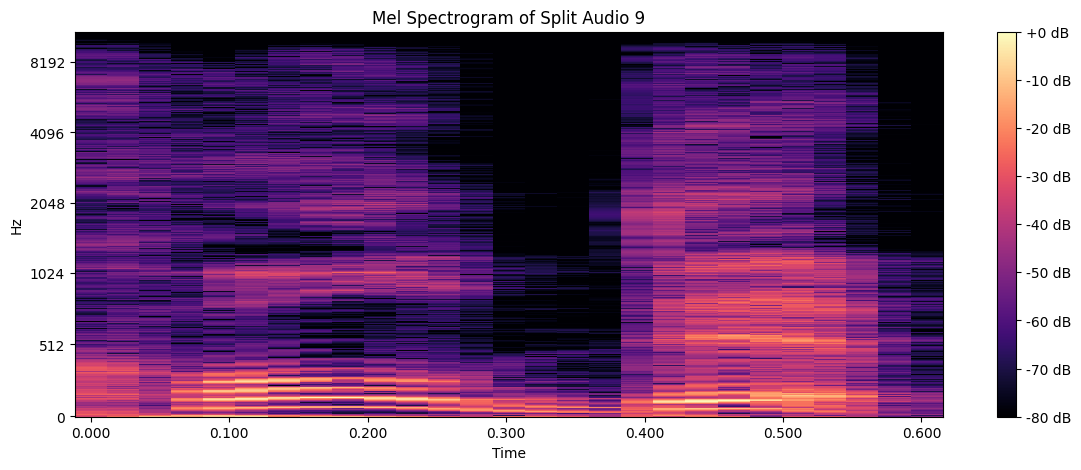

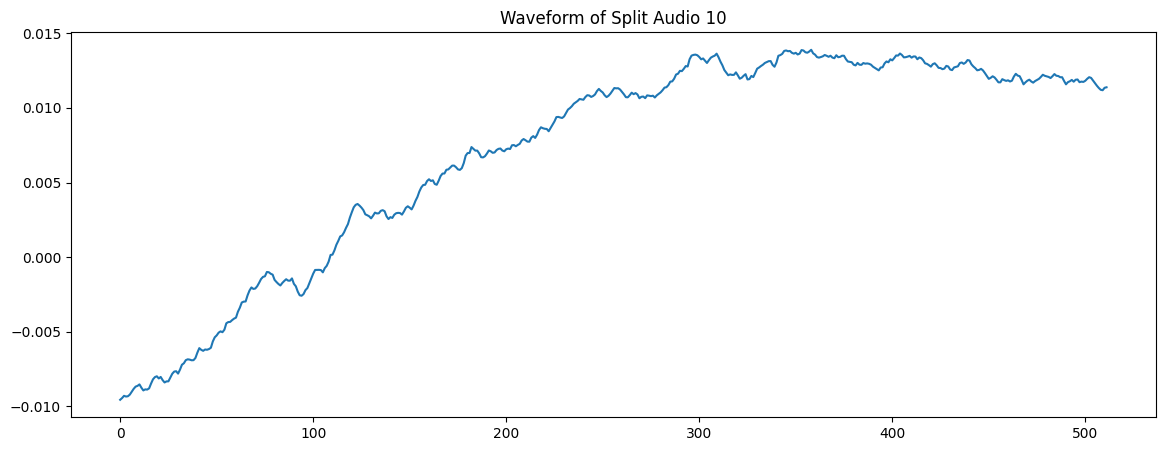

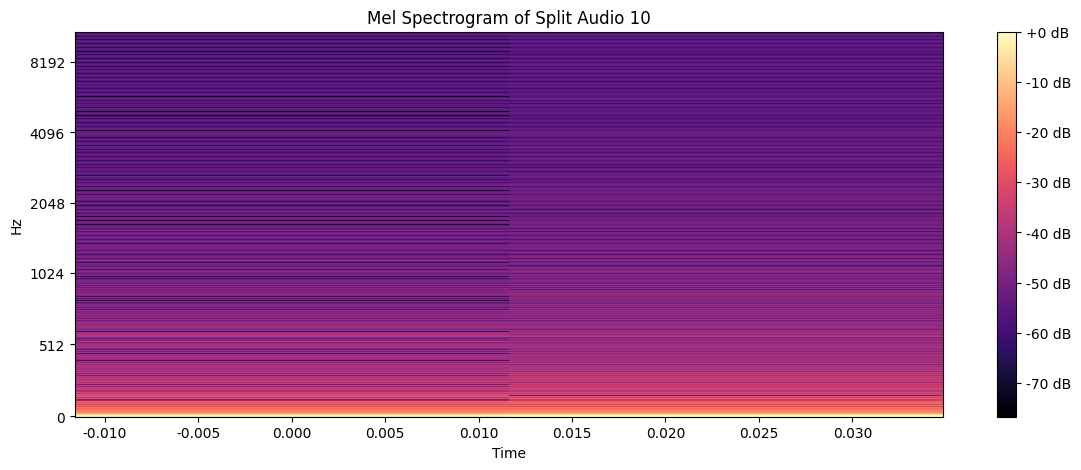

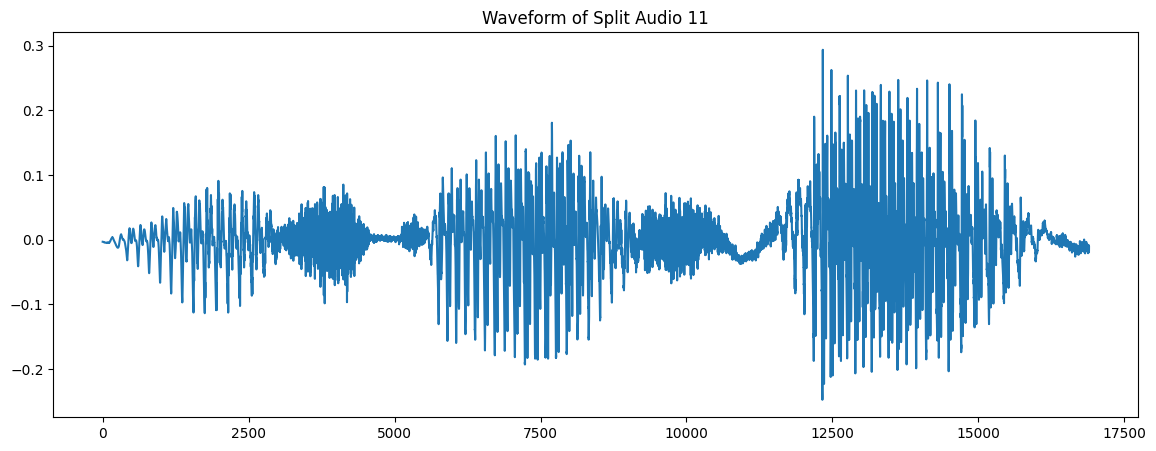

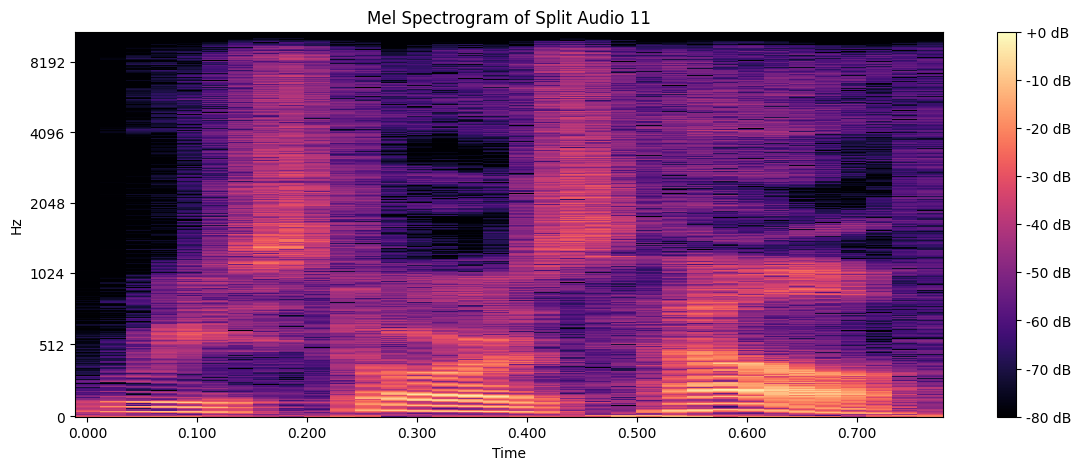

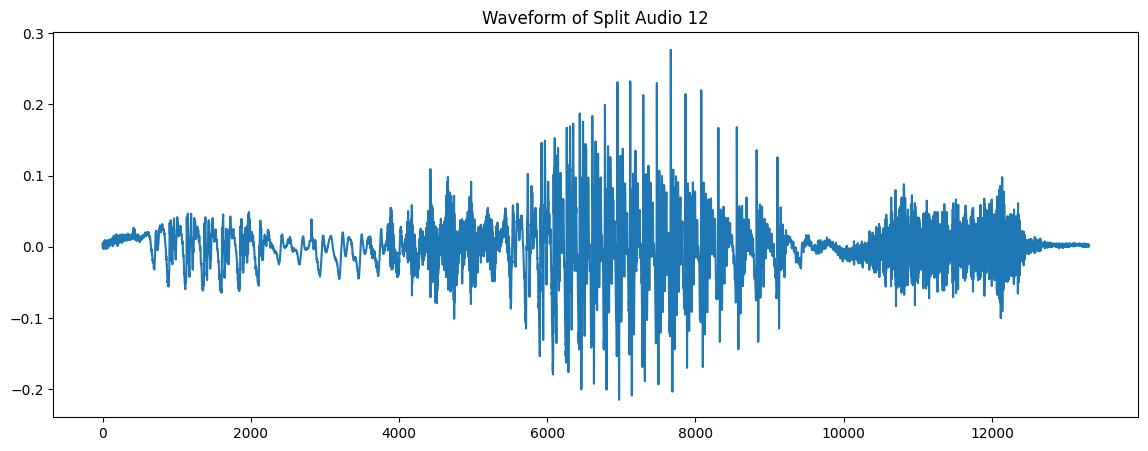

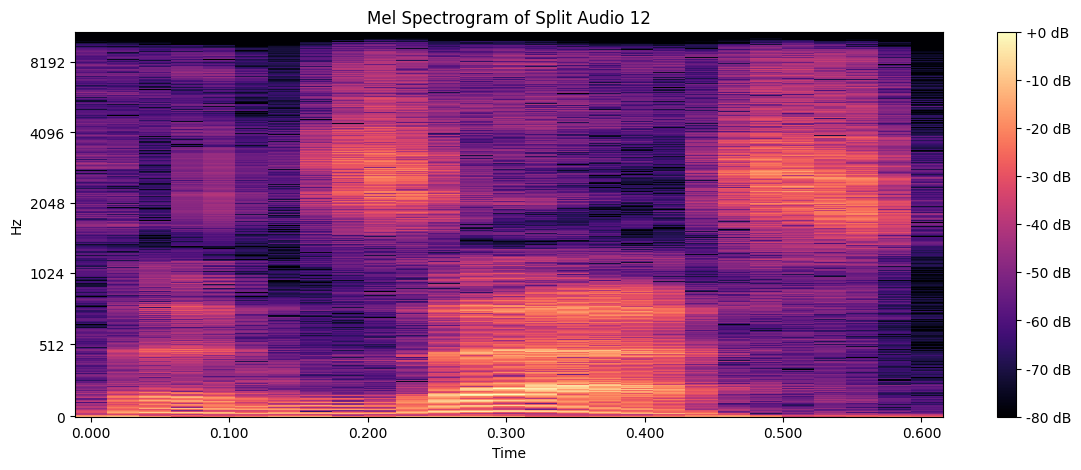

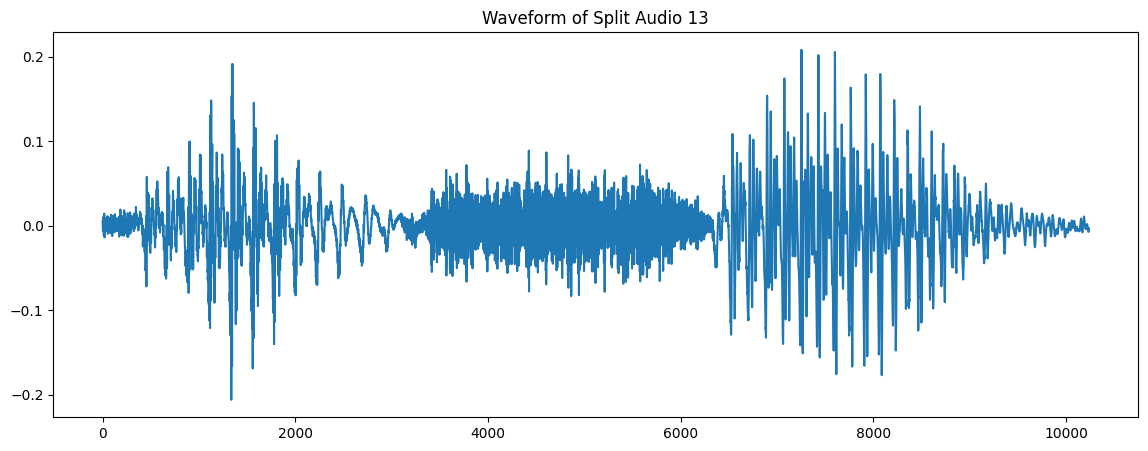

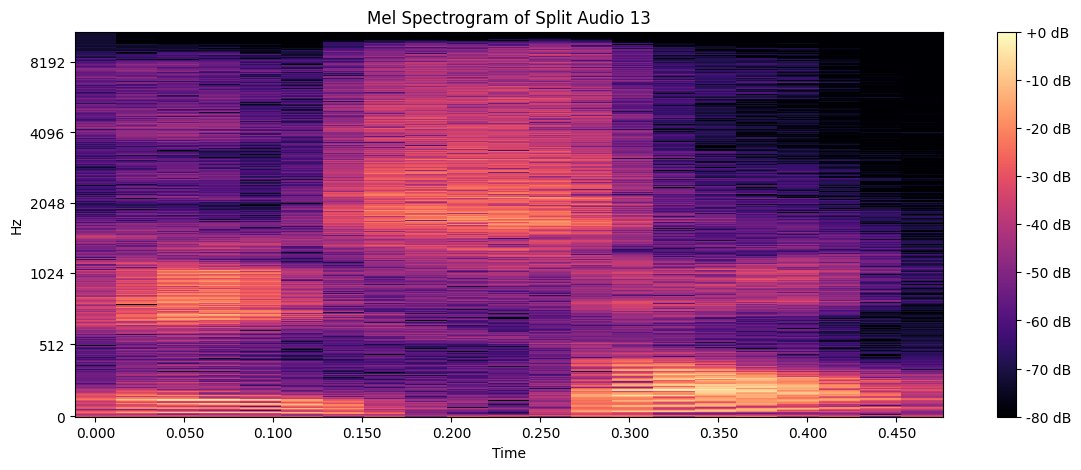

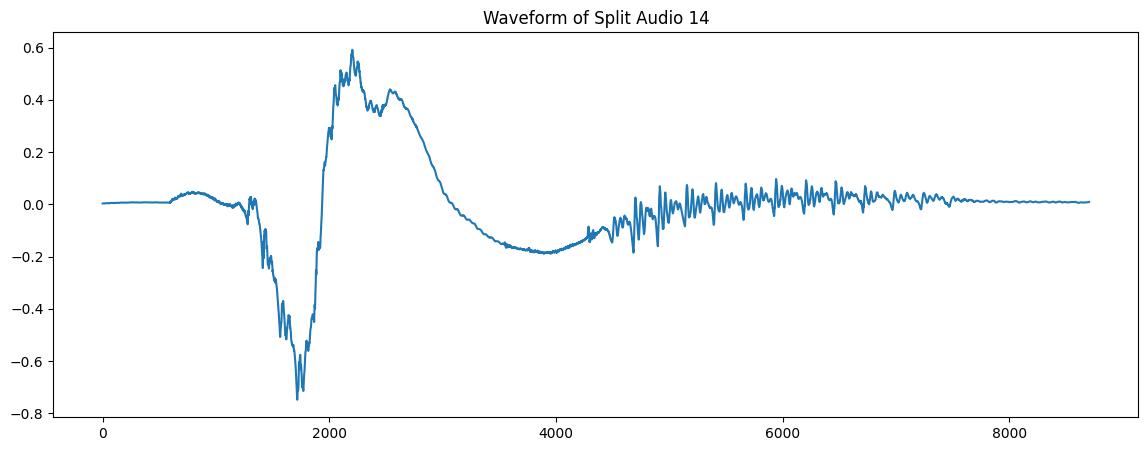

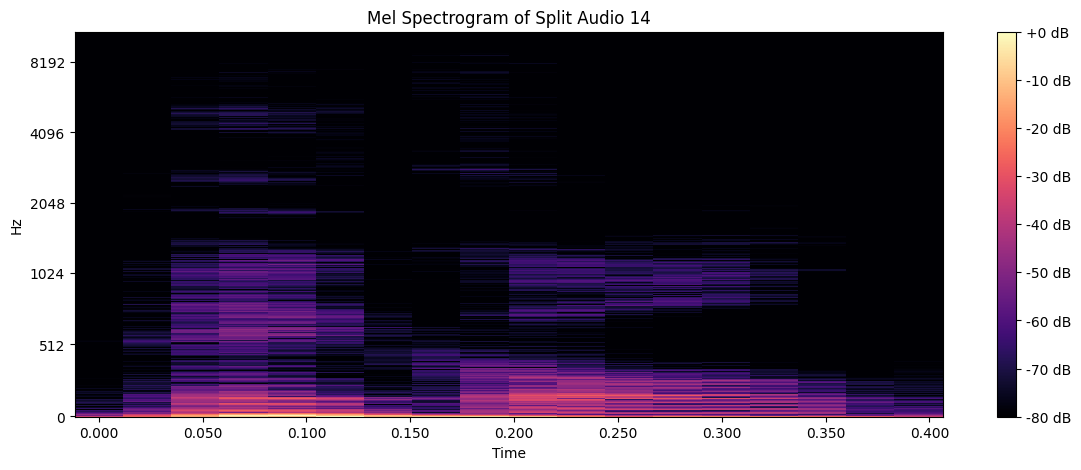

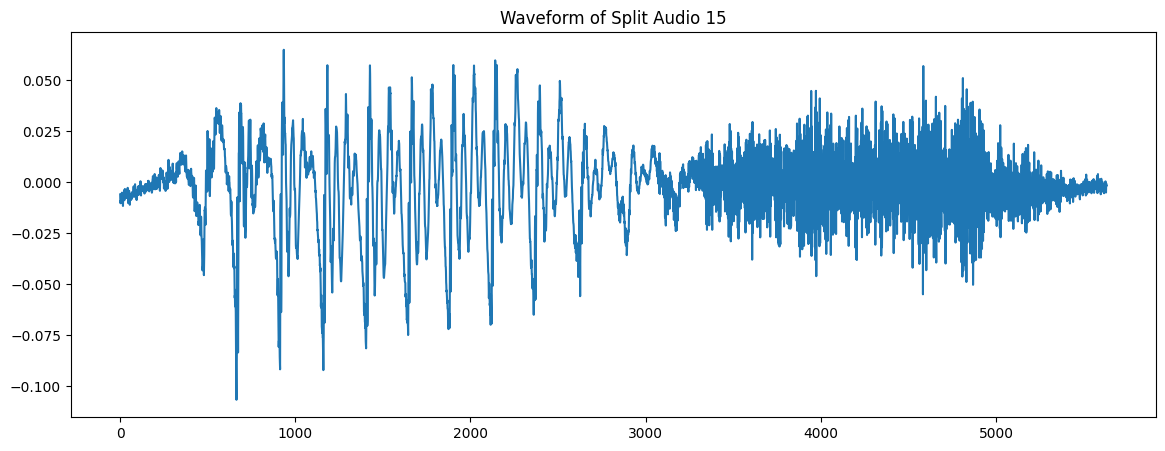

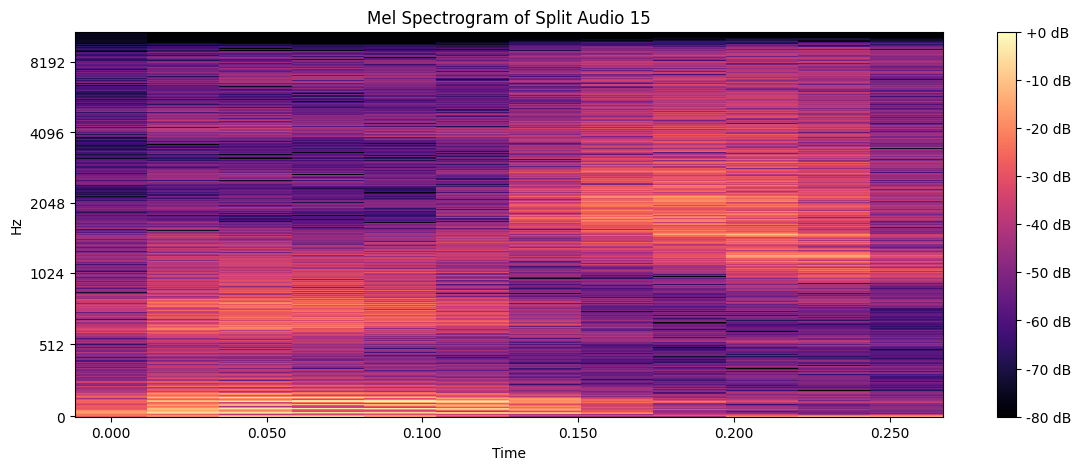

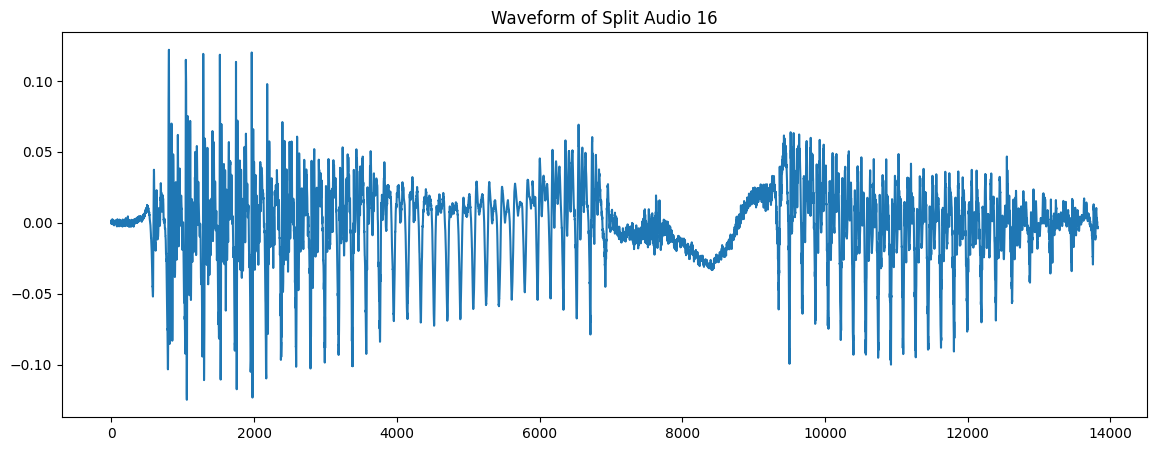

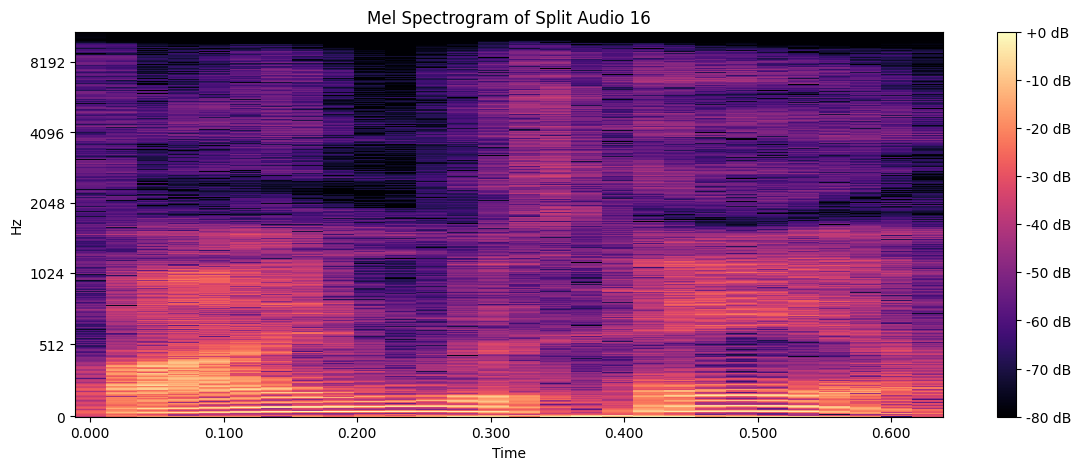

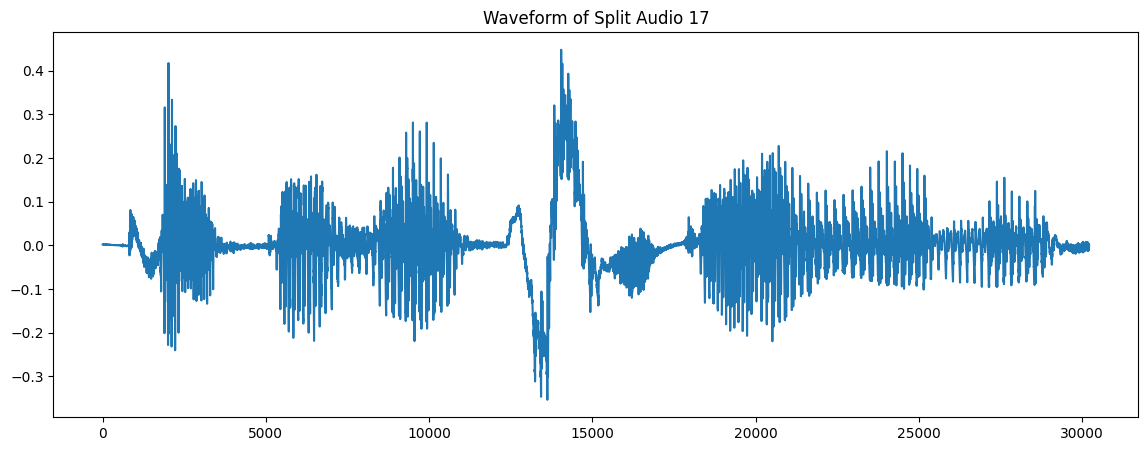

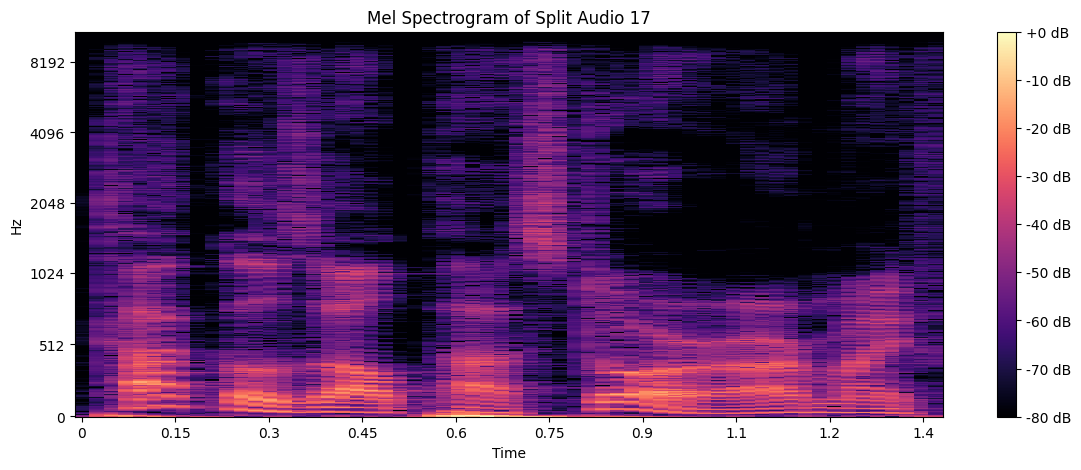

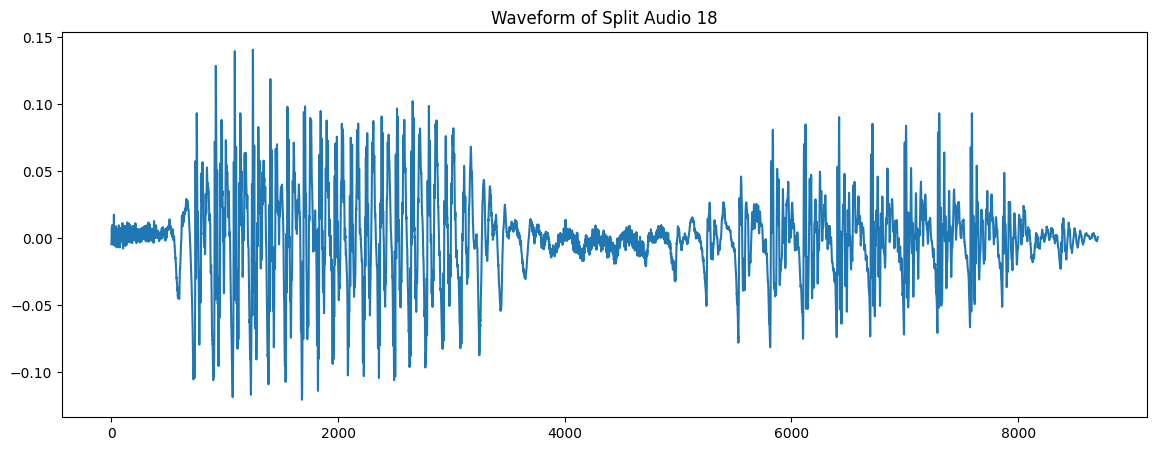

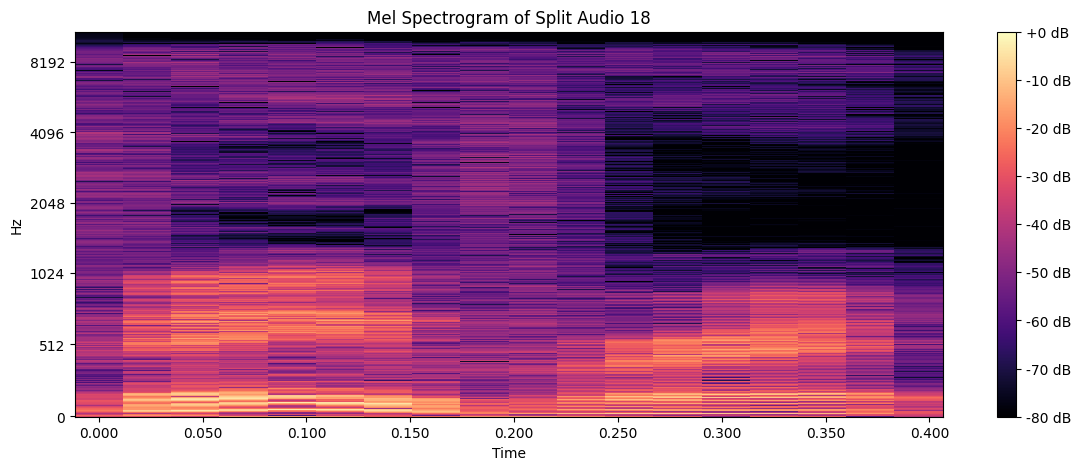

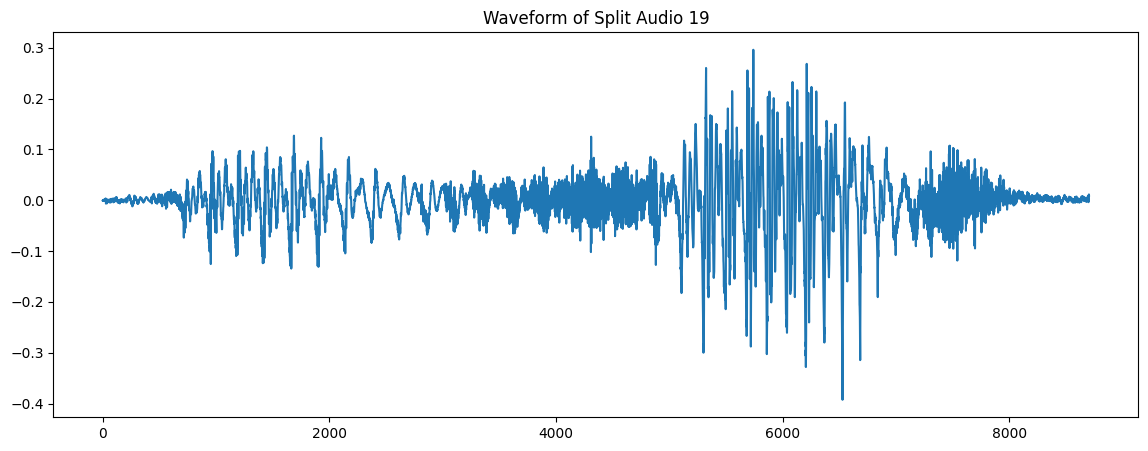

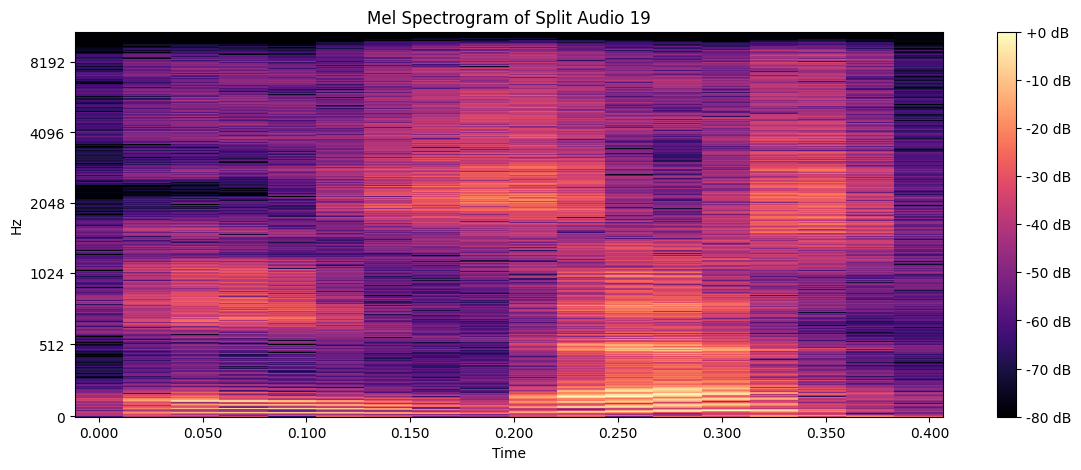

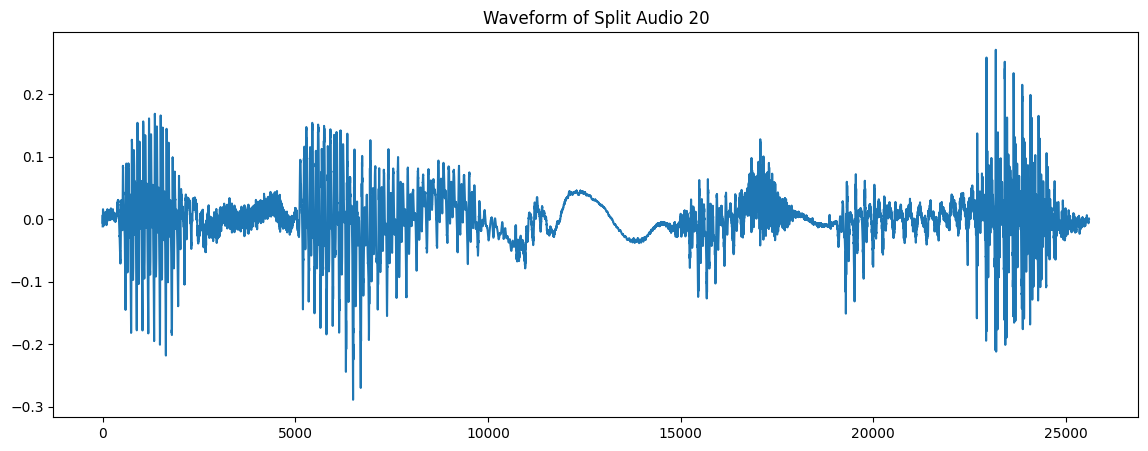

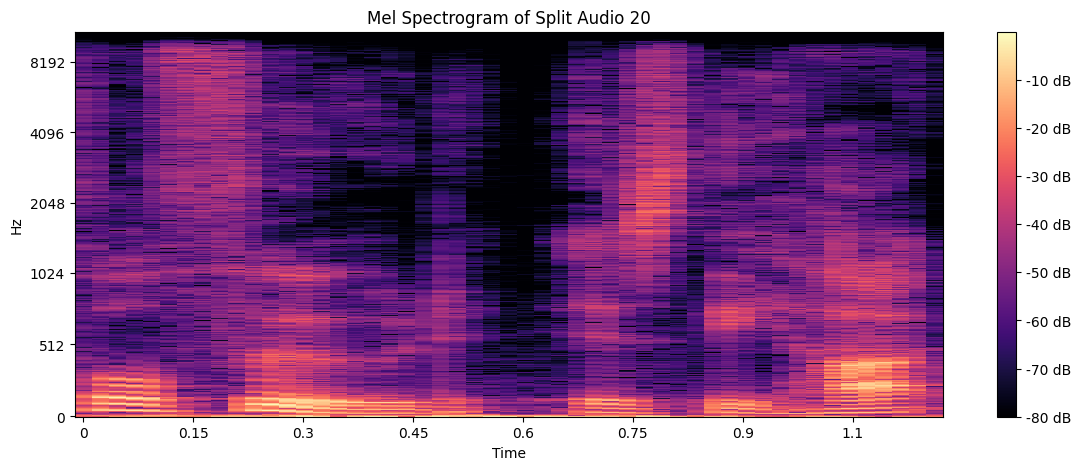

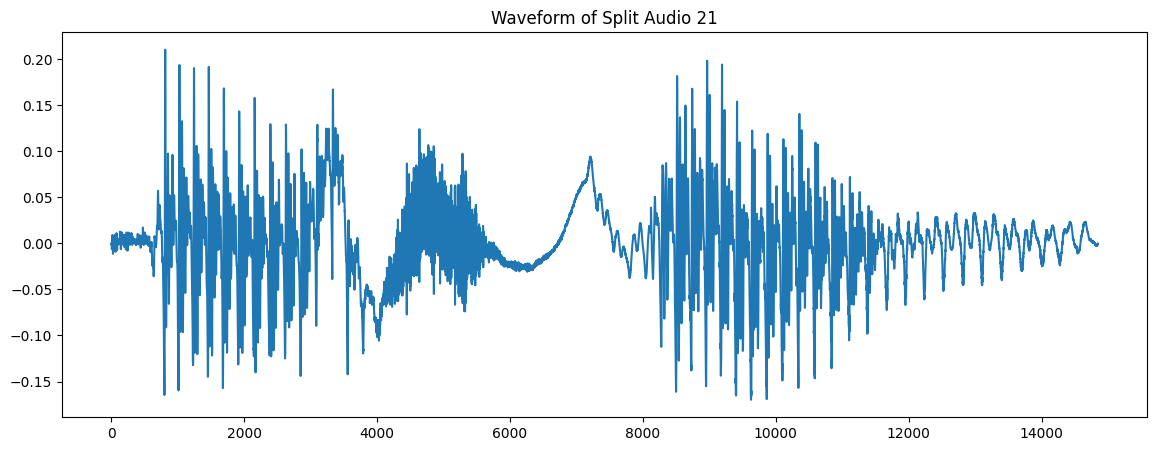

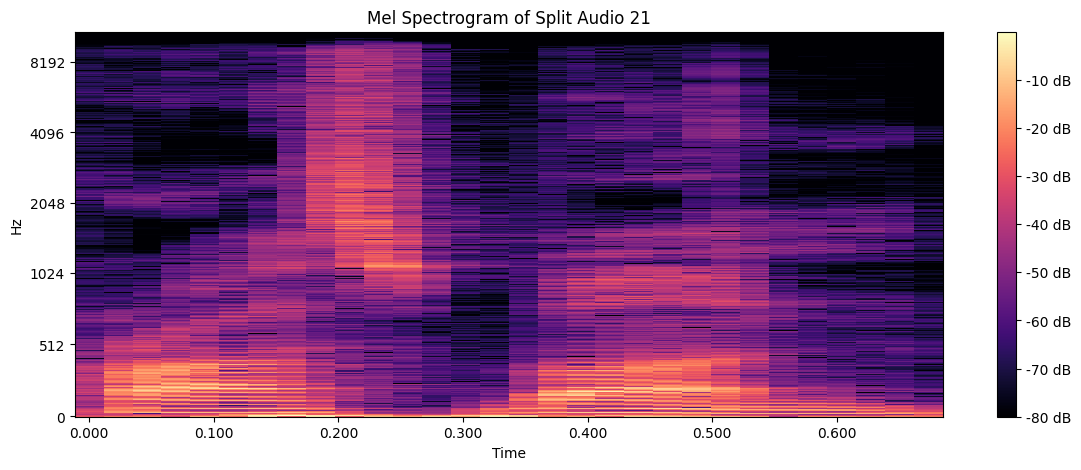

In [4]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load('harvard.wav')

# A1. Trim the silence from the beginning and end
y_trim, index = librosa.effects.trim(y)
sf.write('trimmed_audio.wav', y_trim, sr)

# Plot waveform of original audio
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform of Original Audio')
plt.show()

# Plot melspectrogram of original audio
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Original Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Plot waveform of trimmed audio
plt.figure(figsize=(14, 5))
plt.plot(y_trim)
plt.title('Waveform of Trimmed Audio')
plt.show()

# Plot melspectrogram of trimmed audio
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_trim)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Trimmed Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()

# A2. Split the audio file at points of silence
intervals = librosa.effects.split(y, top_db=30)  # Play around with the top_db parameter
for i, interval in enumerate(intervals):
    start = interval[0]
    end = interval[1]
    y_split = y[start:end]
    sf.write(f'split_audio_{i}.wav', y_split, sr)

    # Plot waveform of split audio
    plt.figure(figsize=(14, 5))
    plt.plot(y_split)
    plt.title(f'Waveform of Split Audio {i}')
    plt.show()

    # Plot melspectrogram of split audio
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_split)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
    plt.title(f'Mel Spectrogram of Split Audio {i}')
    plt.colorbar(format='%+2.0f dB')
    plt.show()